<a href="https://colab.research.google.com/github/Trantracy/MNIST-using-Tensorflow-2.2/blob/master/MNIST_TensorFlow2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import tensorflow
import tensorflow as tf

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
# Loading the MNIST dataset from Tensorflow
mnist = tf.keras.datasets.mnist

In [4]:
# Split training set and test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


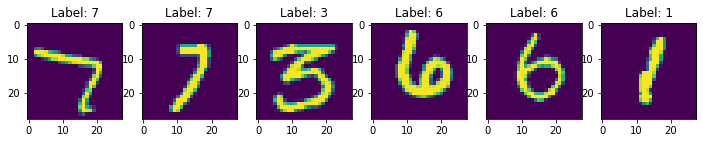

In [5]:
# Plot the train samples
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,6, figsize = (12, 8))

for i in range(6):
  index = np.random.randint(0, len(X_train))
  ax[i].imshow(X_train[index])
  ax[i].set_title(f'Label: {y_train[index]}')

plt.show()

## Build the tf.keras.Sequential model by stacking layers:

In [0]:
# model construction: create the Deep NN:
def create_model():
  model = tf.keras.models.Sequential([
                                      # INPUT layer convert data from (28,28) to 1D array
                                      tf.keras.layers.Flatten(input_shape =(28,28)), 
                                      # Hidden layer: Using relu 
                                      tf.keras.layers.Dense(128,activation = 'relu'), 
                                       # The next layer will have 20% less node than the privious one To avoid overfit
                                      tf.keras.layers.Dropout(0.2),
                                      # OUTPUT layer has 10 nodes (10 numbers to predict) and softmax for milti-classification
                                      tf.keras.layers.Dense(10, activation ='softmax') 
                                      ])
  # compile and train
  model.compile(optimizer = 'Adam', 
                # differ to cross entropy not require the label y in one-hot encoding type.
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])
  return model
model = create_model()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Build the tf.keras.Sequential model by stacking layers. Choose an optimizer and loss function for training:

In [8]:
# Train the model with Train data
history = model.fit(X_train, y_train,verbose=2, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 - 4s - loss: 0.2896 - accuracy: 0.9152 - val_loss: 0.1322 - val_accuracy: 0.9606
Epoch 2/10
1875/1875 - 3s - loss: 0.1393 - accuracy: 0.9585 - val_loss: 0.1029 - val_accuracy: 0.9684
Epoch 3/10
1875/1875 - 3s - loss: 0.1045 - accuracy: 0.9686 - val_loss: 0.0862 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 - 3s - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.0759 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 - 3s - loss: 0.0747 - accuracy: 0.9766 - val_loss: 0.0797 - val_accuracy: 0.9757
Epoch 6/10
1875/1875 - 3s - loss: 0.0632 - accuracy: 0.9800 - val_loss: 0.0691 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 - 3s - loss: 0.0571 - accuracy: 0.9815 - val_loss: 0.0691 - val_accuracy: 0.9789
Epoch 8/10
1875/1875 - 3s - loss: 0.0506 - accuracy: 0.9839 - val_loss: 0.0639 - val_accuracy: 0.9802
Epoch 9/10
1875/1875 - 3s - loss: 0.0465 - accuracy: 0.9850 - val_loss: 0.0686 - val_accuracy: 0.9808
Epoch 10/10
1875/1875 - 3s - loss: 0.0424 - accuracy: 0.9861 - val_loss: 0.0764 - 

In [9]:
# Check the model 
history

In [10]:
# Check the history of model
history.history

{'accuracy': [0.9151833057403564,
  0.9584500193595886,
  0.9686499834060669,
  0.9735833406448364,
  0.9766333103179932,
  0.9800333380699158,
  0.9815000295639038,
  0.9838833212852478,
  0.9850333333015442,
  0.9860833287239075],
 'loss': [0.28955188393592834,
  0.13927112519741058,
  0.10453488677740097,
  0.08588800579309464,
  0.07466515898704529,
  0.0632469654083252,
  0.05708644539117813,
  0.050598423928022385,
  0.046539876610040665,
  0.04235342517495155],
 'val_accuracy': [0.9606000185012817,
  0.9684000015258789,
  0.9735999703407288,
  0.9760000109672546,
  0.9757000207901001,
  0.9801999926567078,
  0.9789000153541565,
  0.9801999926567078,
  0.9807999730110168,
  0.9786999821662903],
 'val_loss': [0.13216716051101685,
  0.10292605310678482,
  0.08620475977659225,
  0.07591965049505234,
  0.079720638692379,
  0.06911824643611908,
  0.06909121572971344,
  0.06386251747608185,
  0.06864980608224869,
  0.07637159526348114]}

In [11]:
#evaluate the model with test data
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9787


[0.07637159526348114, 0.9786999821662903]

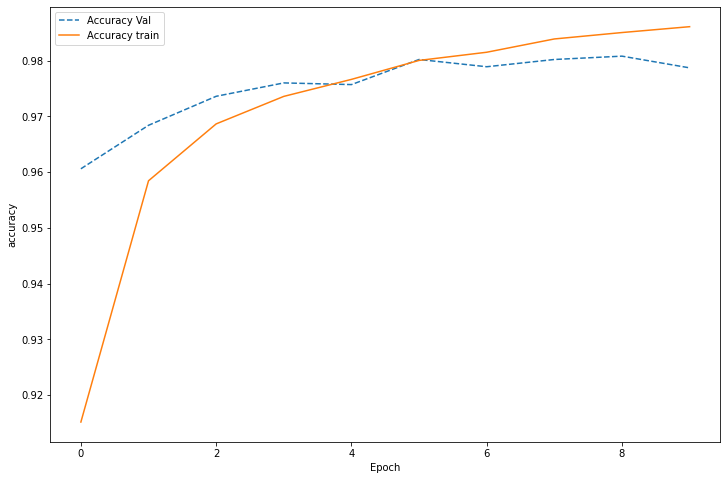

In [12]:
# Visualize model 
def ploth(history,key='loss'):
  plt.figure(figsize=(12,8))
  plt.plot(history.epoch, history.history['val_' +key],'--', label = key.title()+" Val")
  plt.plot(history.epoch, history.history[key], label = key.title() + ' train')
  plt.xlabel('Epoch')
  plt.ylabel(key)
  plt.legend()

ploth(history, key='accuracy')


In [0]:
# Export the model with h5py
import os

In [0]:
!pip install -q h5py

Create a tf.keras.callbacks.ModelCheckpoint callback that saves weights only during training:

In [0]:
checkpoint_path = "training/cp.ckpt"
# Create a callback that saves the model's weights
# by default it saves the weights every epoch
callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, save_weight_only = True)

**That's only the model's weights. How can I save the entire model**

In [0]:
# save all model to HDF5 file
model.save('my_model.h5')

Now, recreate the model from that file:

In [17]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
# new_model.summary()

loss, acc = new_model.evaluate(X_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9787
Restored model, accuracy: 97.87%


Check its accuracy:

In [18]:
loss, acc = new_model.evaluate(X_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9787
Restored model, accuracy: 97.87%


## Transfer Learning and Preprocessing with Tensorflow

In [19]:
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

228818944/228813984 [==============================] - 4s 0us/step
/root/.keras/datasets/flower_photos


In [20]:
for item in data_root.iterdir():
  print(item)

/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/LICENSE.txt
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/daisy


In [21]:
# Calculate the total picture
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
# random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [22]:
# Check the paths
all_image_paths[:10]

['/root/.keras/datasets/flower_photos/sunflowers/4746643626_02b2d056a2_n.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/4893660821_eb7f02bef3_n.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/4932735362_6e1017140f.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/6166888942_7058198713_m.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/9213511121_836a458021_m.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/2619000556_6634478e64_n.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/2706736074_b0fba20b3e.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/6606749757_b98a4ba403.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/22686342422_c0b9e2f38e.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/184682506_8a9b8c662d.jpg']

**That's only a list of paths to the files. How can I have a quick look so I know what I'm dealing with:**

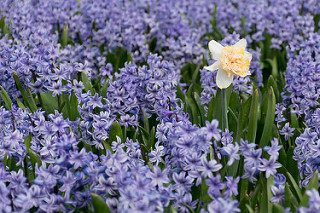

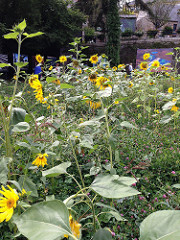

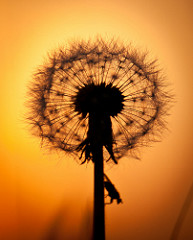

In [23]:
import IPython.display as display

for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print()

In [24]:
# List the available labels:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [25]:
# Assign an index to each label:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [26]:
# Create a list of label index:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


## preprocess the images before training

In [0]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path) # loading path
  image = tf.image.decode_jpeg(image,channels =3) # Decode it into an image tensor:
  image = tf.image.resize(image, [192, 192]) #Resize it for the model as MobielNetV2 require input (192,192)
  image /= 255.0 # normalize image
  return image

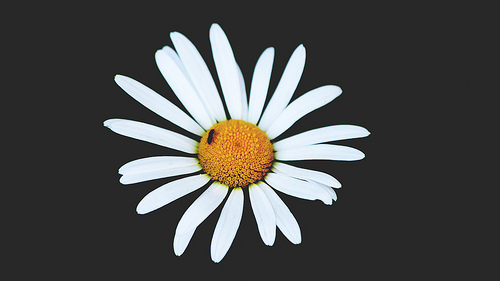

In [38]:
# Show a pic with the path
import IPython.display as display

image_path =all_image_paths[3101]
display.display(display.Image(image_path))


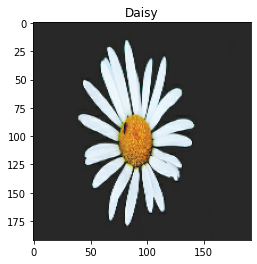

In [40]:
# show pic with preprocessed pic
import matplotlib.pyplot as plt

image_path =all_image_paths[3101]
label = all_image_labels[3101]

plt.imshow(load_and_preprocess_image(image_path))
plt.title(label_names[label].title())
plt.show()

## build a tf.data.Dataset:
To create an input pipeline and how to feed the data into the model efficiently.

To train a model with this dataset, you will want the data:

1. To be well shuffle
2. To repeat forever 
3. To be batched
4. Batches to be available as soon as possible


In [31]:
# Slicing the array of strings, results in a dataset of strings:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
path_ds

<TensorSliceDataset shapes: (), types: tf.string>

In [32]:
# Create a tuple with ( path, labeldata a0 or 1)
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))
ds

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int32)>

In [33]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

#  map function unpacked The tuples into the positional arguments (path, label)
image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [34]:
BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()  
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [0]:
 # tf.data.Dataset 

## Transfer learning with MobileNetV2:

In [0]:
# Fetch a copy of MobileNet v2 from tf.keras.applications
  mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
  mobile_net.trainable=False # To make sure the previous layer NOT be TRAIN onlt the new added layer

In [0]:
model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(label_names), activation = 'softmax')])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [44]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [45]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
history = model.fit(ds, epochs=10, steps_per_epoch=steps_per_epoch)

Epoch 1/10
115/115 [==============================] - 98s 851ms/step - loss: 0.6606 - accuracy: 0.7611
Epoch 2/10
115/115 [==============================] - 95s 823ms/step - loss: 0.3591 - accuracy: 0.8761
Epoch 3/10
115/115 [==============================] - 94s 820ms/step - loss: 0.2857 - accuracy: 0.9041
Epoch 4/10
115/115 [==============================] - 94s 816ms/step - loss: 0.2360 - accuracy: 0.9253
Epoch 5/10
115/115 [==============================] - 93s 812ms/step - loss: 0.2035 - accuracy: 0.9367
Epoch 6/10
115/115 [==============================] - 91s 791ms/step - loss: 0.1805 - accuracy: 0.9495
Epoch 7/10
115/115 [==============================] - 93s 810ms/step - loss: 0.1606 - accuracy: 0.9557
Epoch 8/10
115/115 [==============================] - 90s 787ms/step - loss: 0.1423 - accuracy: 0.9625
Epoch 9/10
115/115 [==============================] - 91s 787ms/step - loss: 0.1327 - accuracy: 0.9649
Epoch 10/10
115/115 [==============================] - 90s 785ms/step - l